<a href="https://colab.research.google.com/github/steinruck/WANG-690-FALL-2020/blob/master/Assignment_08/Assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
# 1 - Import necessary libraries
import pandas as pd
import seaborn as sns
import glob
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 2 - Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22 files

# unzip CollegeScorecard_Raw_Data
!unzip /content/CollegeScorecard_Raw_Data.zip

Archive:  /content/CollegeScorecard_Raw_Data.zip
   creating: CollegeScorecard_Raw_Data/
  inflating: CollegeScorecard_Raw_Data/MERGED2011_12_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED1999_00_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2006_07_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2014_15_PP.csv  
  inflating: CollegeScorecard_Raw_Data/.DS_Store  
  inflating: CollegeScorecard_Raw_Data/MERGED2003_04_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED1996_97_PP.csv  
  inflating: CollegeScorecard_Raw_Data/FieldOfStudyData1516_1617_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2012_13_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2005_06_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2009_10_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2018_19_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2017_18_PP.csv  
  inflating: CollegeScorecard_Raw_Data/Crosswalks.zip  
  inflating: CollegeScorecard_Raw_Data/MERGED200

In [7]:
# Retrieve only useful files
file_list = glob.glob('/content/CollegeScorecard_Raw_Data/MERGED*')

In [8]:
# Display 22 files
file_list

['/content/CollegeScorecard_Raw_Data/MERGED2015_16_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2016_17_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2001_02_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2007_08_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2012_13_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2006_07_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2011_12_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2000_01_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2005_06_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2004_05_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2002_03_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2008_09_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2014_15_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2003_04_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED1997_98_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2017_18_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MER

In [21]:
# 3 - Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name
random_int = random.randrange(0,21)
year = file_list[random_int-1]
year

'/content/CollegeScorecard_Raw_Data/MERGED2002_03_PP.csv'

In [154]:
# 4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")
read_year = pd.read_csv(year)
df = pd.DataFrame(read_year,columns=['INSTNM','TUITIONFEE_IN'])
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INSTNM,TUITIONFEE_IN
0,Community College of the Air Force,NaN
1,Alabama A & M University,3040.0
2,University of Alabama at Birmingham,3880.0
3,Amridge University,8960.0
4,University of Alabama in Huntsville,3764.0


In [155]:
# from this file into a data frame aand display use info() function to display a summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6652 entries, 0 to 6651
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         6652 non-null   object 
 1   TUITIONFEE_IN  4049 non-null   float64
dtypes: float64(1), object(1)
memory usage: 104.1+ KB


In [156]:
# 5 - Find out how many observations have missing value.
df.isnull().sum()

INSTNM              0
TUITIONFEE_IN    2603
dtype: int64

In [157]:
# 6 - Drop those observations with missing value
# Disaply the number of observations afterward
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4049 entries, 1 to 6650
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         4049 non-null   object 
 1   TUITIONFEE_IN  4049 non-null   float64
dtypes: float64(1), object(1)
memory usage: 94.9+ KB


In [159]:
# 7 - Find out how many observations have 0 tution. 
zero = df.loc[df['TUITIONFEE_IN'] == 0]
zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 734 to 3087
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         4 non-null      object 
 1   TUITIONFEE_IN  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 96.0+ bytes


In [161]:
# 8 - Drop those observations with 0 tuition
# Disaply the number of observations afterward
df = df[df.TUITIONFEE_IN != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4045 entries, 1 to 6650
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         4045 non-null   object 
 1   TUITIONFEE_IN  4045 non-null   float64
dtypes: float64(1), object(1)
memory usage: 94.8+ KB


In [162]:
# 9 - Calculate and display the mean (average) of the tuitions of all the remaining observations 
mean = np.mean(df['TUITIONFEE_IN'])
mean

7857.799505562422

In [164]:
# 10 - Randomly select just 1 observation from the data frame.
# Display the tuition of that observation. 
sample = df['TUITIONFEE_IN'].sample()
sample

3097    4300.0
Name: TUITIONFEE_IN, dtype: float64

In [53]:
# 11 - Calculate the different between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference
difference = mean - sample
difference


3564    6248.799506
Name: TUITIONFEE_IN, dtype: float64

In [76]:
# 12 - Repeat 10 to 11 several times get the feel of the size of the difference in means
difference_10 = (df['TUITIONFEE_IN'].sample(10)) - mean
difference_10

2749    -5268.799506
1920     4940.200494
1089    -6744.799506
74      -4880.799506
2336     9514.200494
3907    19704.200494
5502       -9.799506
3236     6092.200494
1694    -5937.799506
1750    -6395.799506
Name: TUITIONFEE_IN, dtype: float64

In [165]:
# 13 - Randomly select 20 observations, display the tuition of these observation. 
df_two = df['TUITIONFEE_IN'].sample(20)
df_two

146      1114.0
2725     2184.0
5875     6738.0
2236    23772.0
5143     1152.0
3852    18744.0
1363     7088.0
2171     7429.0
1458    17490.0
4537     4780.0
3200     7340.0
4835     1245.0
2383     9600.0
2372     6910.0
2045     8000.0
2060    26702.0
322       348.0
1401     7770.0
4001    16341.0
1051     3936.0
Name: TUITIONFEE_IN, dtype: float64

In [166]:
# 14 - Calculate and displat the mean tuition of these 20 observations
mean_20 = np.mean(df_two)
mean_20

8934.15

In [167]:
# 15 - Calculate  the different between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference
difference_mean_20 = mean_20 - mean
difference_mean_20


1076.3504944375773

In [169]:
# 16 - Repeat 13 to 15 several times and get the feel of the size of the difference in means 
# Compare these differences with the differences calculated earlier with just 1 observation
# Describe your hunch/conclusion
difference_mean_list = []
for i in range(10):
  difference_mean_20 = (np.mean((df['TUITIONFEE_IN'].sample(20)))) - mean
  difference_mean_list.append(difference_mean_20)
difference_mean_list

[-608.5995055624226,
 1461.300494437578,
 721.8504944375773,
 1417.2004944375776,
 -1300.199505562422,
 847.8504944375773,
 -1111.9995055624222,
 954.8504944375773,
 1202.4004944375783,
 -1617.0995055624226]

### - from these observations it appears that the difference in means calculated with a sample size of 20 tends to be closer to the mean of the whole list compared to the difference between just one value and the total mean. 

Write a function that take two input parameters:
- x (number of observations) 
- y (the name of the dataframe). 

The function will perform the following: 
- Randomly select x observations from y
- Calculate the mean of these x observations 
- Calculate the mean of all observations
- Calculate the difference between the two means 
- Return the difference

In [171]:
# 17 - write function Code here
def mean_op(x,y):
    sample_mean = np.mean((y.sample(20)))
    total_mean = np.mean(df['TUITIONFEE_IN'])
    diff_mean = total_mean - sample_mean
    return diff_mean

In [172]:
# 18 - test the function by passing a sample size and the name of the dataframe
# Dsplay the return of the function
mean_op(20,df['TUITIONFEE_IN'])

-1411.250494437577

In [144]:
# 19 - Create a list of sequence numbers from 1 to 50, name it "sample_sizes";
# display it to make sure its members are from 1 to 50
sample_size = []
for i in range(1,51):
    sample_size.append(i)
sample_size

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [173]:
# 20 - Create an empty list and name it "means_diff" for differences of population mean and sample means;
# Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed

means_diff = []
for i in sample_size:
    sample1 = np.mean((df['TUITIONFEE_IN'].sample(i)))
    pop_mean = np.mean(df['TUITIONFEE_IN'])
    diff_means = pop_mean - sample1
    means_diff.append(diff_means)
print(means_diff)


[-1102.2004944375776, 6345.299505562422, -4176.200494437578, -546.7004944375776, 96.39950556242275, -857.3671611042437, 1005.7995055624224, -3034.4504944375776, -1862.978272215355, -1560.9004944375783, 1031.3449601078773, 1407.5495055624224, -769.2004944375776, -3426.5576372947207, 1571.3328388957561, -2006.9504944375776, 1776.2112702683044, -1166.311605548689, -2204.253126016524, 737.3995055624227, -1072.5338277709116, 59.75405101696742, -1442.7222335680117, 1653.0911722290894, -2933.2804944375775, -705.4312636683471, 559.5772833401998, 1571.2995055624224, 1732.5926090106987, -867.0004944375769, 1112.9607958850029, -1434.2942444375776, -465.9277671648497, -196.5828473787542, 1005.5423627052796, 180.60506111797804, 568.7724785353957, 522.4047687203174, -25.482545719629343, 194.59950556242256, -241.56634809611387, -2219.0338277709116, -372.34002932129897, 777.5495055624224, -1123.311605548689, -48.7222335680126, -435.15794124608783, -440.6796611042437, 844.7995055624224, -920.4604944375

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


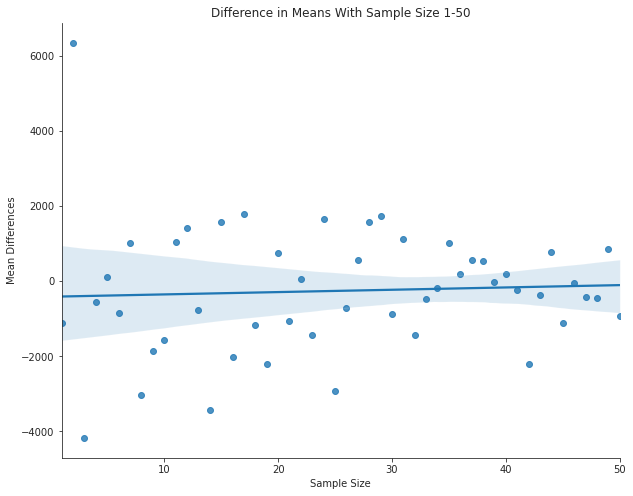

In [174]:
# 21 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.regplot(sample_size, means_diff, ax=ax)
sns.despine()
plt.xlabel("Sample Size")
plt.ylabel("Mean Differences")
plt.title("Difference in Means With Sample Size 1-50")
plt.show()

In [175]:
sample_size2 = []
for i in range(1,501):
    sample_size2.append(i)
sample_size2

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [176]:
means_diff1 = []
for i in sample_size2:
    sample1 = np.mean((df['TUITIONFEE_IN'].sample(i)))
    pop_mean = np.mean(df['TUITIONFEE_IN'])
    diff_means = pop_mean - sample1
    means_diff1.append(diff_means)
print(means_diff1)

[5857.799505562422, 4297.799505562422, 5690.132838895755, 1092.7995055624224, -2941.800494437578, -8436.700494437577, 1408.5137912767077, 4539.299505562422, -2843.311605548689, 2895.5995055624226, -1346.7459489830317, 1104.1328388957554, -1579.2004944375776, 169.44236270527927, 1209.6661722290892, -1172.3879944375776, -124.6122591434596, 1561.7995055624224, -384.88470496389255, -420.0004944375769, 2102.5137912767077, -533.3368580739416, 604.5386359972053, -1304.4504944375776, -1825.1604944375767, -141.12357136065475, 535.0587648216815, 846.1209341338508, 590.9374365969052, 2614.566172229089, -773.974687985964, 2316.7057555624224, -837.8368580739416, 348.06421144477554, 1017.4280769909938, -717.4227166598002, -344.71400795109093, -1596.9899681217876, -830.4312636683471, -1516.7754944375783, -746.4687871205051, -762.938589675673, -564.340029321299, 231.9813237442404, 329.33283889575614, -545.5917987854036, -1180.583473160982, -26.867161104244587, -792.9351883151294, -1106.4604944375778, 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


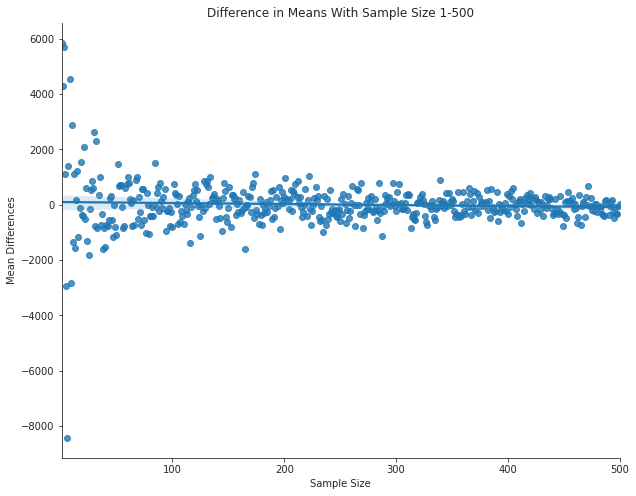

In [177]:
# 22 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000.
# and see how the plot looks.
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.regplot(sample_size2, means_diff1, ax=ax)
sns.despine()
plt.xlabel("Sample Size")
plt.ylabel("Mean Differences")
plt.title("Difference in Means With Sample Size 1-500")
plt.show()

In [ ]:
# The end - Give yourself a pat on the back!